In [4]:
import mycentpy 
import numpy as np
import matplotlib.pyplot as plt
from math import pi

带有阻尼和驱动力的振子的微分方程为：
                $$ \frac {d^2\theta}{d\tau} + \frac{1}{Q} \frac{d\theta}{d\tau} + sin\theta = F cos\Omega\tau $$

其中 相应的参数意义为
                        $$ \begin {array}{ll}
                        \omega_0 = \sqrt{\frac{g}{l}}\\ 
                          \Omega = \frac{\mu}{\omega_0}\\
                          F = \frac{f}{mg}\\
                          Q = \frac{m\omega_0}{\gamma}\\
                          \tau = \omega_0t
                          \end{array}$$

转换成向量形式为
                    $$\frac{d}{dt}\left[\begin{array}{ll}
                    \theta \\
                    \Theta 
                    \end{array}\right]   +    \left[\begin{array}{lll}
                                        -\Theta \\
                                        \frac{1}{Q}\Theta+sin\theta-Fcos\Omega\tau
                                        \end{array}\right] = \left[\begin{array}{l1}0\\0\end{array}\right]$$

In [5]:
pars = mycentpy.Pars1d(
    t_final = 3000*3.1415926,
    dt_out = 0.05,
    scheme = 'rk4'
)
pars.Q = 4.0
pars.F = 1.4
pars.omu = 1.0
T = 2*pi/pars.omu
pars.t_final = 10*T
pars.dt_out = T/100


In [6]:
class nonliner(mycentpy.Equation1d):
    def initial_data(self):
        u = np.zeros((1,2))
        u[0,0] = 10
        return u 
        
    
    def flux_x(self,u):
        f = np.zeros_like(u)
        theta1 = u[:,0]
        theta2 = u[:,1]
        
        f[:,0] = theta1
        f[:,1] = theta2
        return f
    
    def actavite(self,u,t):
        a = np.zeros_like(u)
        Q = self.Q
        F = self.F
        omu = self.omu
    
        theta1 = u[:,0]
        theta2 = u[:,1]
        
        a[:,0] = -1 * theta2
        a[:,1] = 1 / Q * theta2 + np.sin(theta1) - F * np.cos(omu*t)
        return  a
    
    
        
        

In [7]:
eqn = nonliner(pars)
soln = mycentpy.Solver1d(eqn)
soln.solve()


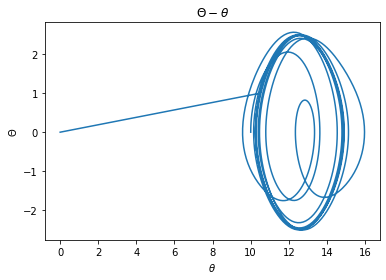

In [8]:
plt.plot(soln.u_n[:,0,0],soln.u_n[:,0,1])
plt.title(r"$\Theta - \theta$")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\Theta$')
plt.show()

Text(0, 0.5, '$\\theta$')

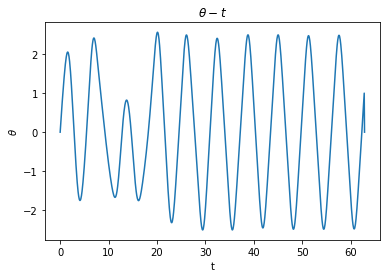

In [9]:
plt.plot(np.linspace(0,pars.t_final,soln.u_n.shape[0]),soln.u_n[:,0,1])
plt.title(r"$\theta - t$")
plt.xlabel(r't')
plt.ylabel(r'$\theta$')